In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img1 = cv2.imread('antes.png')
img2 = cv2.imread('depois.png')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

height, width = img1.shape[:2]

cell_w = width // 8
cell_h = height // 8

print("Largura e altura da celula", cell_w, cell_h)

Largura e altura da celula 101 101


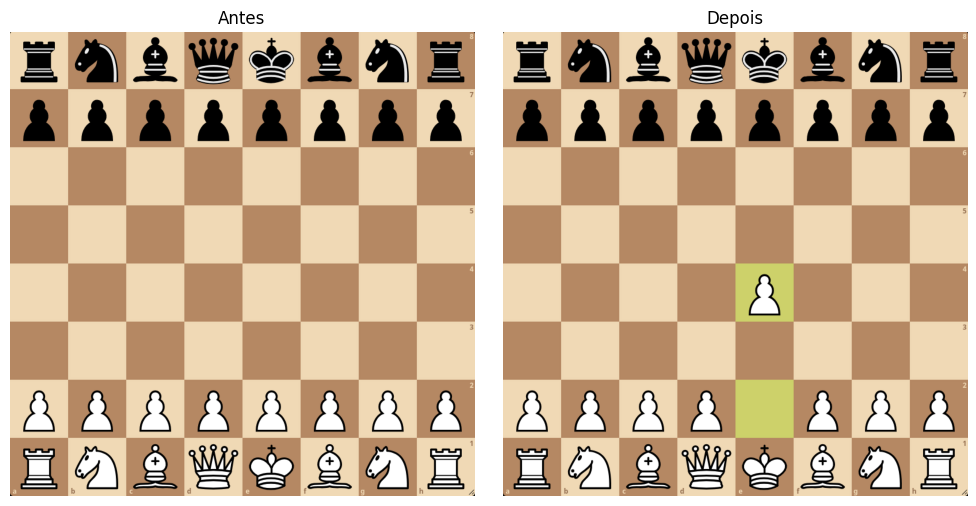

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title('Antes')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title('Depois')
plt.axis('off')

plt.tight_layout()
plt.show()

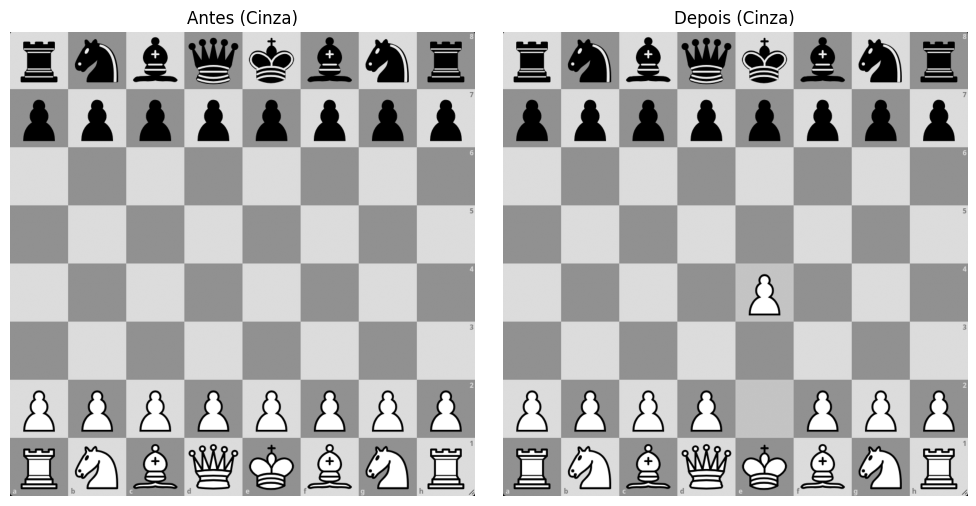

In [18]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title('Antes (Cinza)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Depois (Cinza)')
plt.axis('off')

plt.tight_layout()
plt.show()

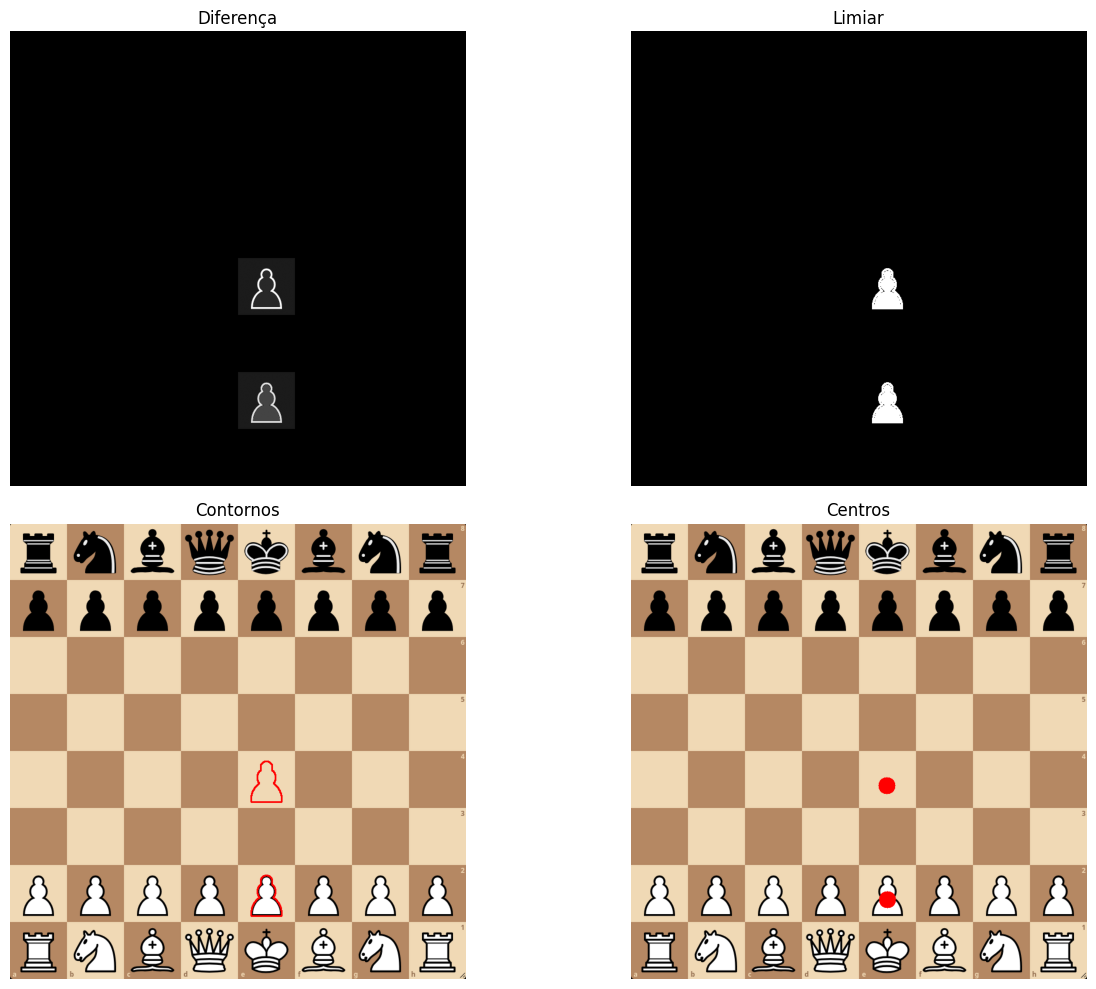

In [19]:
diff = cv2.absdiff(gray1, gray2)
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar imagens de saída
output_contours = img1_rgb.copy()
cv2.drawContours(output_contours, contours, -1, (255, 0, 0), 2)

output_centers = img1_rgb.copy()
centers = []

for cnt in contours:
    M = cv2.moments(cnt)
    if M['m00'] > 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centers.append((cx, cy))
        cv2.circle(output_centers, (cx, cy), 15, (255, 0, 0), -1)

# Exibir em layout 2x2
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(diff, cmap='gray')
plt.title('Diferença')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Limiar')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(output_contours)
plt.title('Contornos')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(output_centers)
plt.title('Centros')
plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
casas = []
for cx, cy in centros:
    col = cx // cell_w  # coluna (0 a 7)
    row = cy // cell_h  # linha (0 a 7)
    casas.append((row, col))  # linha 0 é a de cima, coluna 0 é a da esquerda

print("Casas onde houve mudanças:", casas)

Casas onde houve mudanças: [(6, 4), (4, 4)]


In [23]:
def posicao_xadrez(row, col):
    col_letra = chr(ord('a') + col)
    row_num = 8 - row  # linha 0 é a 8ª linha no xadrez
    return f"{col_letra}{row_num}"

nomes = [posicao_xadrez(r, c) for r, c in casas]
print("Posições das casas em notação de xadrez:", nomes)

Posições das casas em notação de xadrez: ['e2', 'e4']
